TASK: Extract and plot the amplitudes of the Eigen images in every snapshot

In [1]:

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt       
from matplotlib import rcParams       # import to change plot parameters
from matplotlib import cm             # imports colormaps
from matplotlib.ticker import MultipleLocator, FormatStrFormatter 
# we will use the line above to make the big plot of the PCA components below

import numpy as np                    # imports library for arrays
from tqdm import tqdm

# Below I import my own library. On my laptop they are located in home+'/Dropbox/research/master_code'
# Change that line of code so that it matches the location of the files on your laptop
import sys
from os.path import expanduser
home = expanduser("~")
sys.path.append(home+'/Documents/UGA_Research/forJuvis')
from my_func import * # my module with some helpful functions
from my_plot import * # my module with some plotting functions
from my_pca  import * # my module with some PCA functions

textwidth   = 7.1014
columnwidth = 3.39441
font        = 12

from addon_modules import open_hdf5

Importing the Data Cubes with Image Data

In [2]:
image_cube = open_hdf5('data_cube_mwc758.h5')  #original unblurred images
blurred_cube = open_hdf5('filtered_data_cube_800.h5') #images blurred with r=800
blurred_cube1 = open_hdf5('filtered_data_cube_1088.7573072109703.h5') #images blurred with r=1088



In [26]:
eigen_values, eigen_vectors = diy_PCA(image_cube)

np.shape(eigen_values), np.shape(eigen_vectors)

((162,), (162, 600, 600))

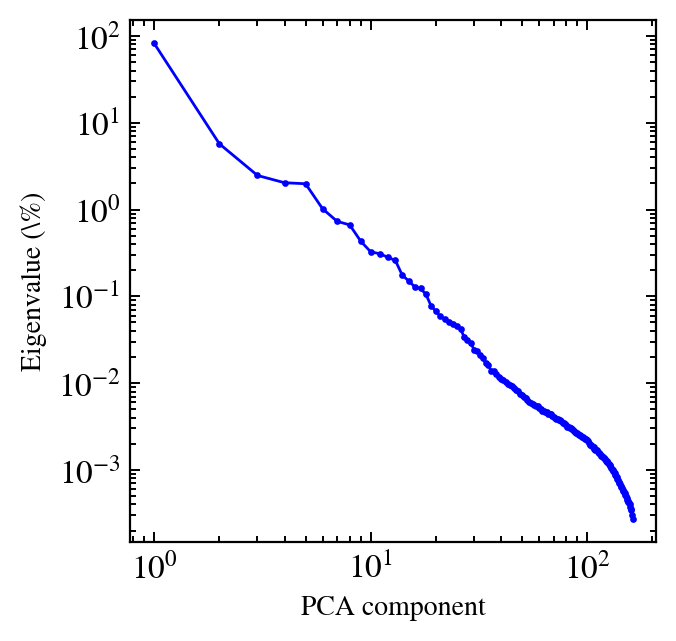

In [29]:
num=len(eigen_values) # number of eigenvalues you want to include in the plot, 1024 max
fig,(ax1) = plt.subplots(1,1)    
fig.set_size_inches(columnwidth,columnwidth)
ax1.scatter(np.arange(num)+1, eigen_values[:num]*100.,s=2, color='b')# multiply by 100 to make it a percent
ax1.loglog(np.arange(num)+1, eigen_values[:num]*100.,lw=1, color='b')# multiply by 100 to make it a percent
ax1.set_xlabel('PCA component')
ax1.set_ylabel('Eigenvalue (\%)')
ax1.tick_params(axis='both', which='both', labelsize=font,width=.7,direction='in', right=True, top=True,color='k') 

# fig.savefig('PCA_eigenvalues.pdf', bbox_inches='tight') # this line saves the figure to a file, uncomment if you'd like to do that


The Code block below actually calculates the amplitude of each eigenimage in every snapshot and returns a multi dimensional array

In [28]:
def get_amplitudes (x, num, images, pc):
     #x is the number of pixels
     #number is the number of pca components to be used
     #images are the images to be used
     #pc are the principal components

     storage = []

     for i in tqdm(range(images.shape[0]), desc="Calculating the amplitudes ..."):
          amps = get_amps(pc[:num,:,:], images[i,:,:])
          storage.append(amps)
     
     return storage


val = get_amplitudes(600, len(eigen_values), image_cube, eigen_vectors)

# a row in this array has elements which correspond to the amplitude of a particular pca component in a snapshot



Calculating the amplitudes ...: 100%|██████████| 162/162 [06:09<00:00,  2.28s/it]


In [31]:
np.shape(val)

(162, 162)

Plot below shows variation of intensity of each amplitude of ev in a particular snapshot

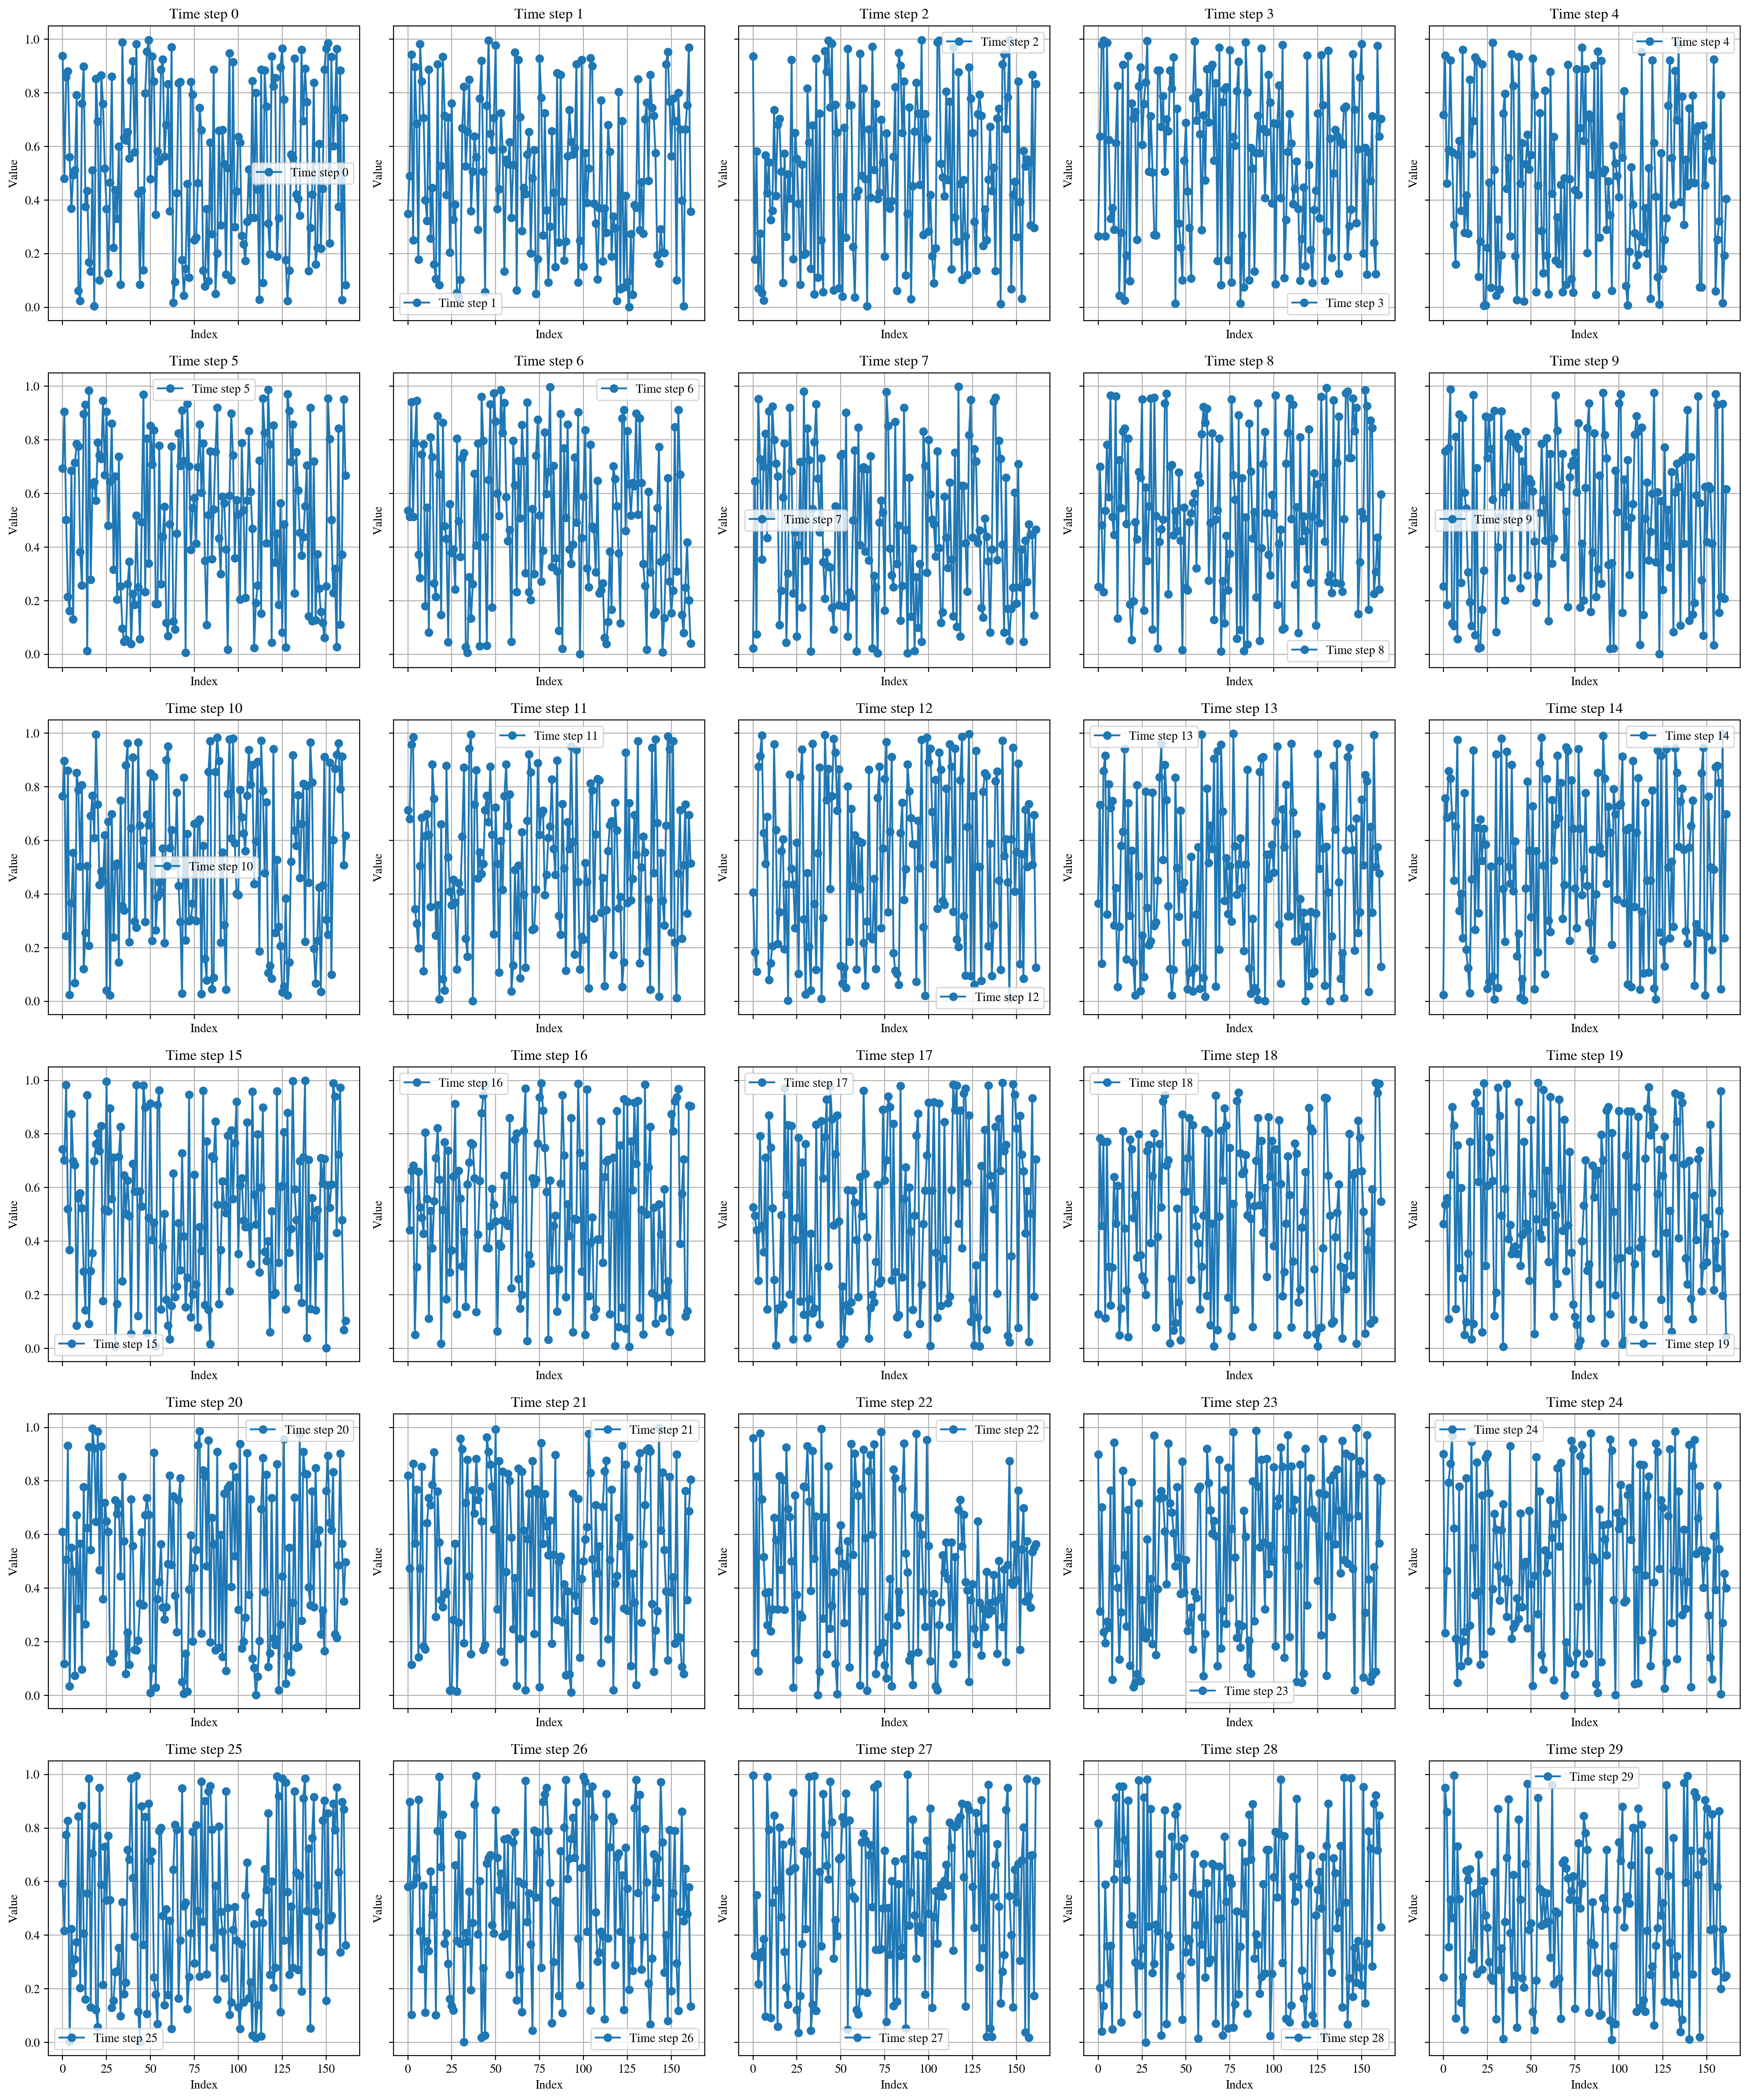

In [21]:

import matplotlib.pyplot as plt
import numpy as np



# Create time array for columns (X-axis for each subplot)
index = range(len(val[0]))

# Number of rows
num_rows = len(val)

# Determine the number of subplots needed
columns_per_row = 5
num_subplot_rows = (num_rows + columns_per_row - 1) // columns_per_row  # Ceiling division

# Create subplots
fig, axs = plt.subplots(num_subplot_rows, columns_per_row, figsize=(20, num_subplot_rows * 4), sharex=True, sharey=True)

# Flatten the 2D array of axes to make it easier to iterate
axs = axs.flatten()

# Plot each row in its own subplot
for row_index in range(num_rows):
    values = val[row_index]
    axs[row_index].plot(index, values, marker='o', linestyle='-', label=f'Time step {row_index}')
    axs[row_index].set_title(f'Time step {row_index}')
    axs[row_index].set_xlabel('Index')
    axs[row_index].set_ylabel('Value')
    axs[row_index].grid(True)
    axs[row_index].legend()

# Hide any unused subplots
for i in range(num_rows, len(axs)):
    axs[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()



Changes in Values for a particular principal component

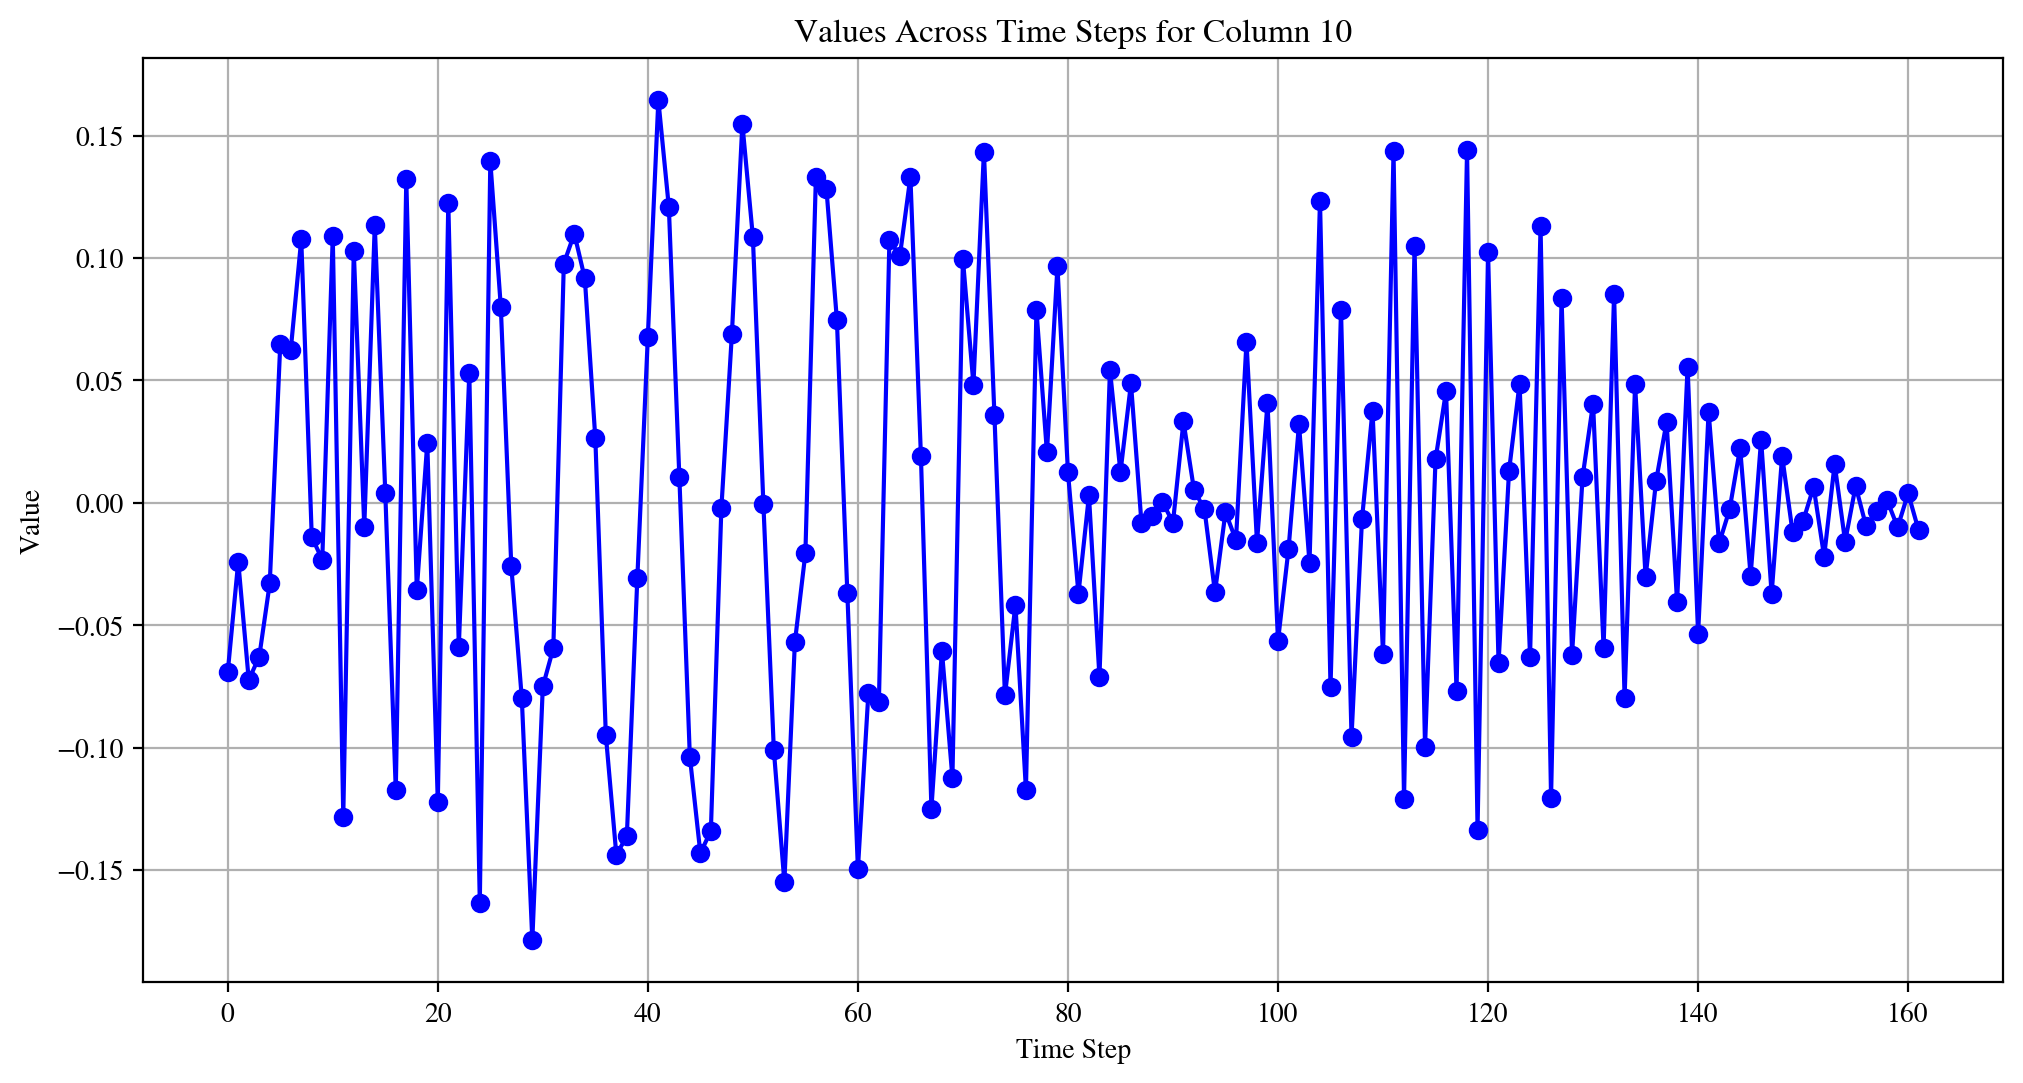

In [32]:
# Choose the column you want to visualize (e.g., column 5)
column_index = 10 #this is actually the visualization of pca number 10



# Create time array for rows

values = [row[column_index] for row in val] # extract all values accros column 10. Thus show the values of the amplitudes for different snapshots
# Plot the values of the chosen column across rows

time_steps = range(len(values))
plt.figure(figsize=(12, 6))
plt.plot(time_steps, values, marker='o', linestyle='-', color='b')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title(f'Values Across Time Steps for Column {column_index}')
plt.grid(True)
plt.show()

IndexError: index 30 is out of bounds for axis 0 with size 30

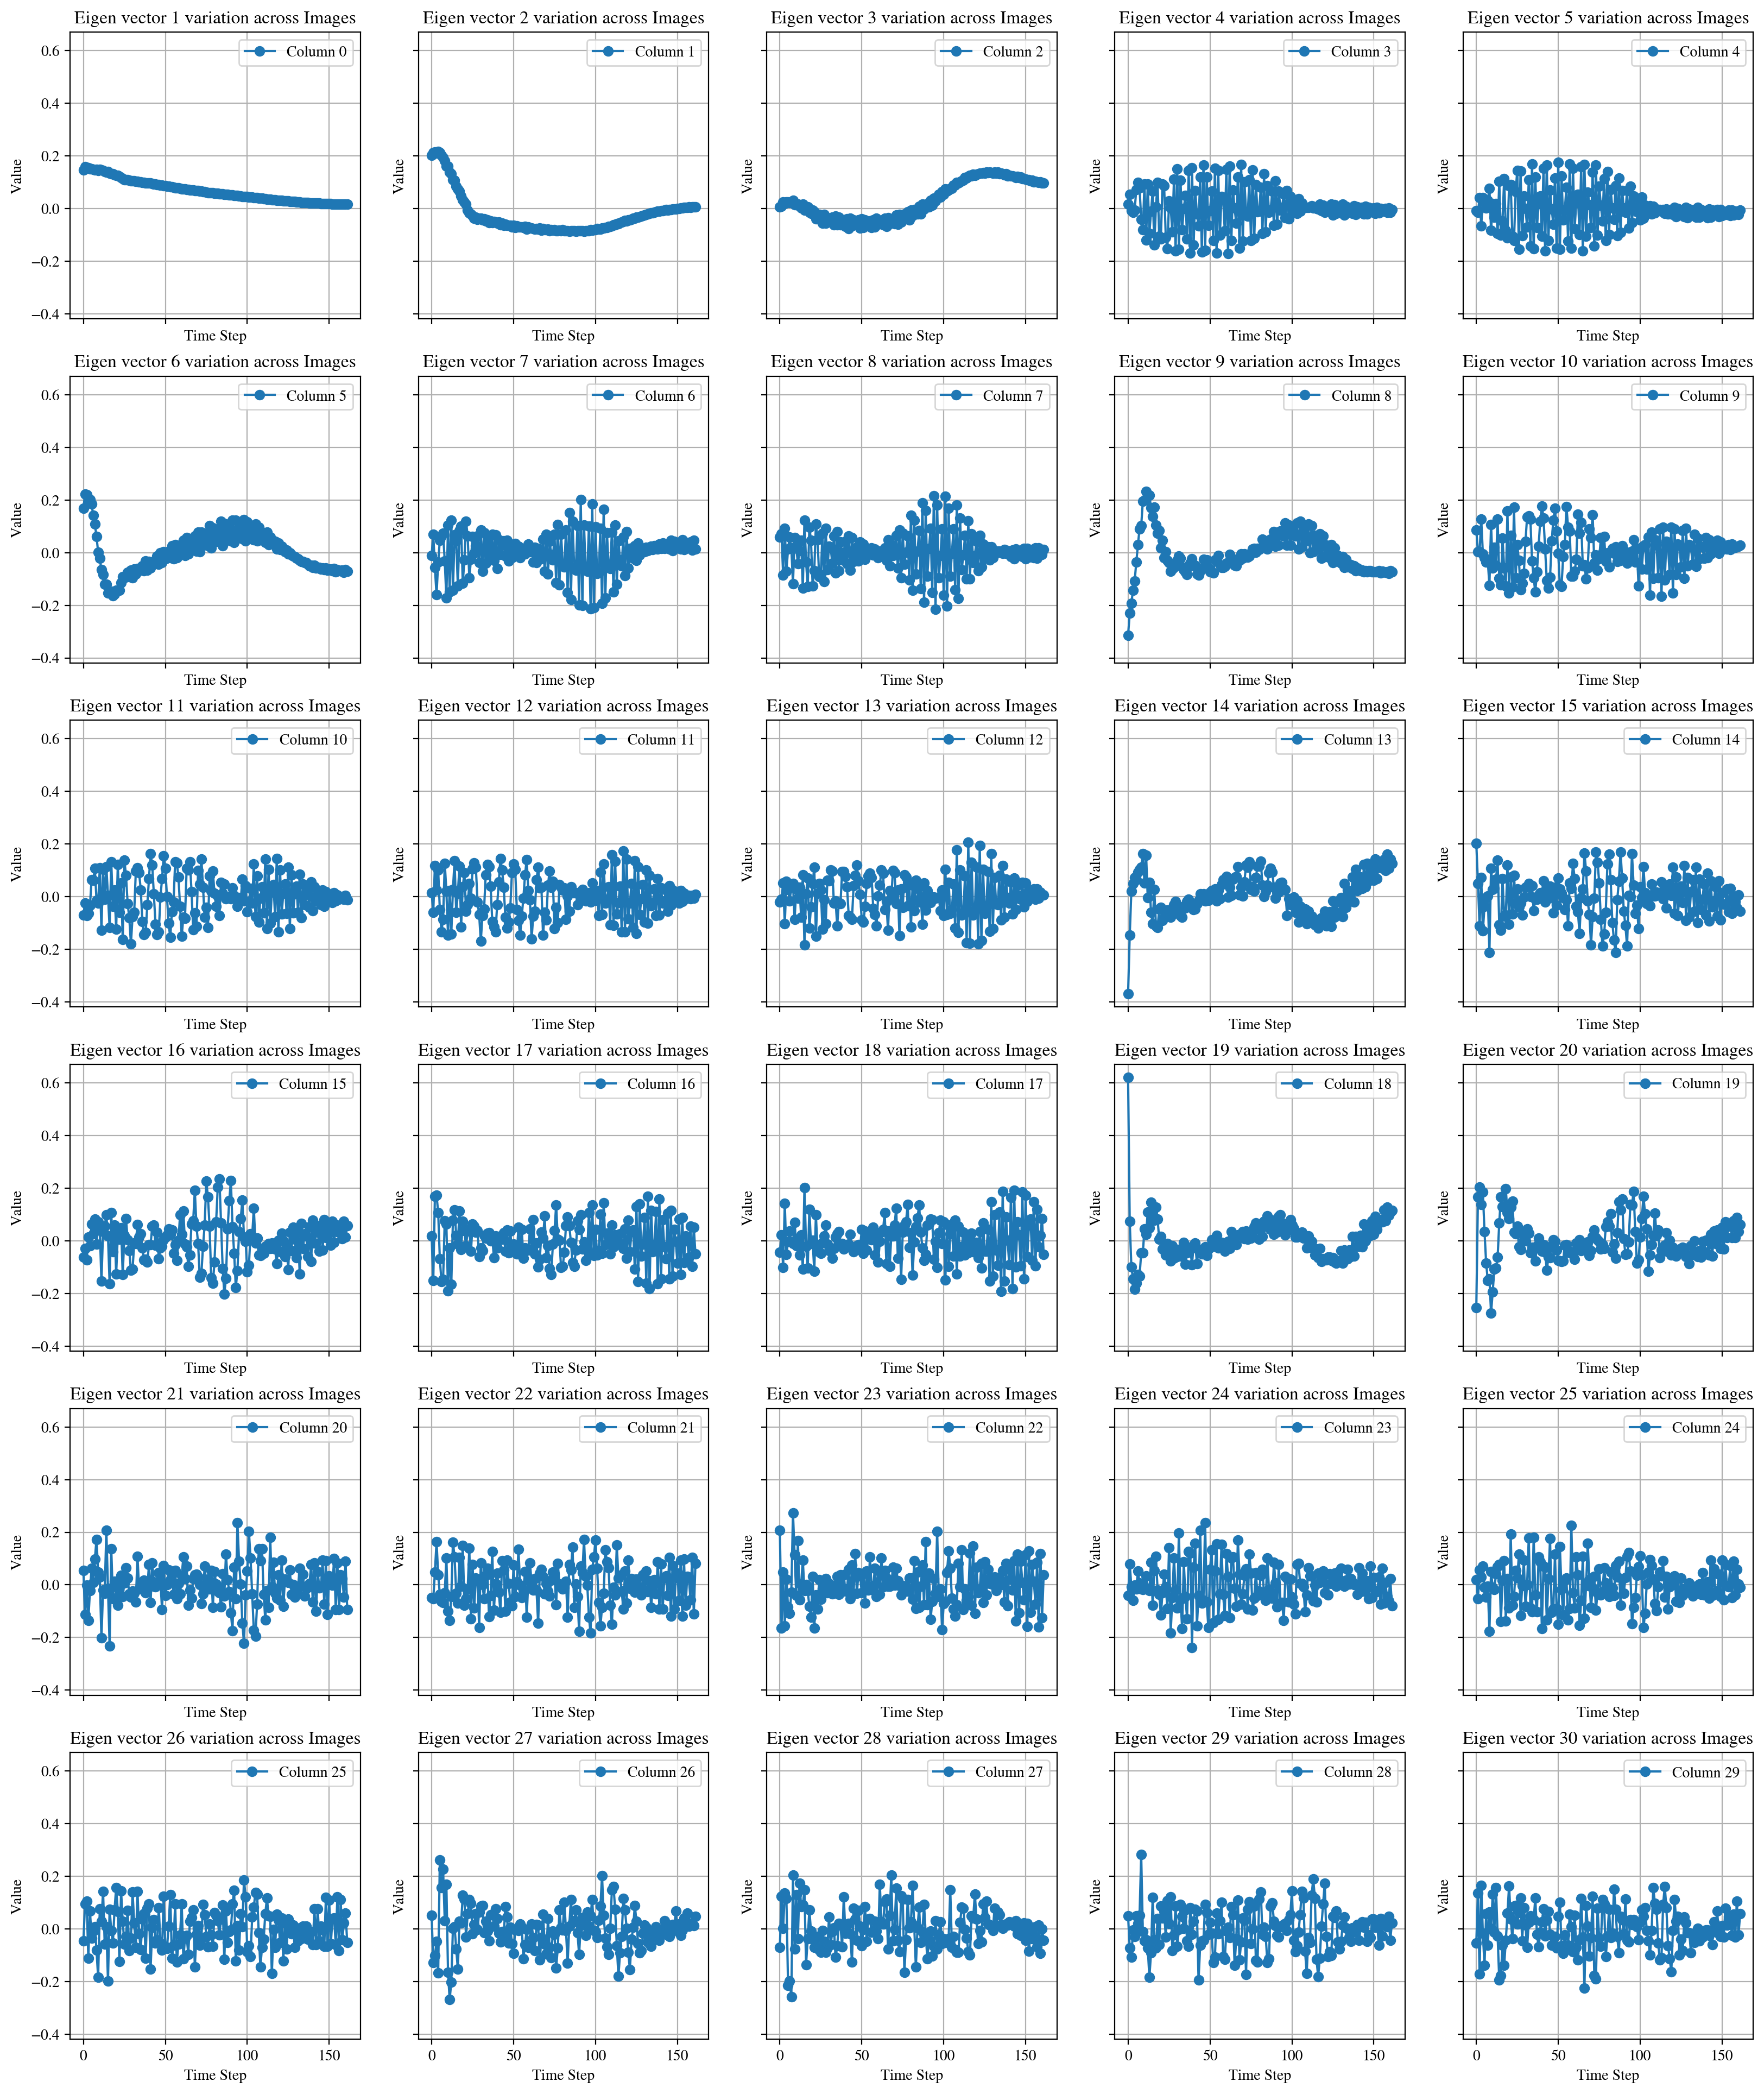

In [38]:
# Determine the number of subplots needed
# Here, we use a grid with 5 columns and as many rows as needed
columns_per_row = 5
num_columns =30
num_rows = (num_columns + columns_per_row - 1) // columns_per_row  # Ceiling division

# Create the subplots
fig, axs = plt.subplots(num_rows, columns_per_row, figsize=(20, num_rows * 4), sharex=True, sharey=True)

# Flatten the 2D array of axes to make it easier to iterate
axs = axs.flatten()
time_steps = range(len(val))

# Number of columns
num_columns = len(val[0])
# Plot each column in its own subplot
for column_index in range(num_columns):
    values = [row[column_index] for row in val]
    axs[column_index].plot(time_steps, values, marker='o', linestyle='-', label=f'Column {column_index}')
    axs[column_index].set_title(f'Eigen vector {column_index+1} variation across Images')
    axs[column_index].set_xlabel('Time Step')
    axs[column_index].set_ylabel('Value')
    axs[column_index].grid(True)
    axs[column_index].legend()

# Hide any unused subplots
for i in range(num_columns, len(axs)):
    axs[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

I shall now visually inspect the planets position

pos1      124.322399
pos2      111.472853
pos3      103.144948
pos4       94.339394
pos5       88.029377
             ...    
pos158     60.515018
pos159     59.339799
pos160     60.635234
pos161     59.490544
pos162     60.224589
Name: 0, Length: 162, dtype: float64


pos1      124.322399
pos2      111.472853
pos3      103.144948
pos4       94.339394
pos5       88.029377
             ...    
pos158     60.515018
pos159     59.339799
pos160     60.635234
pos161     59.490544
pos162     60.224589
Name: 0, Length: 162, dtype: float64


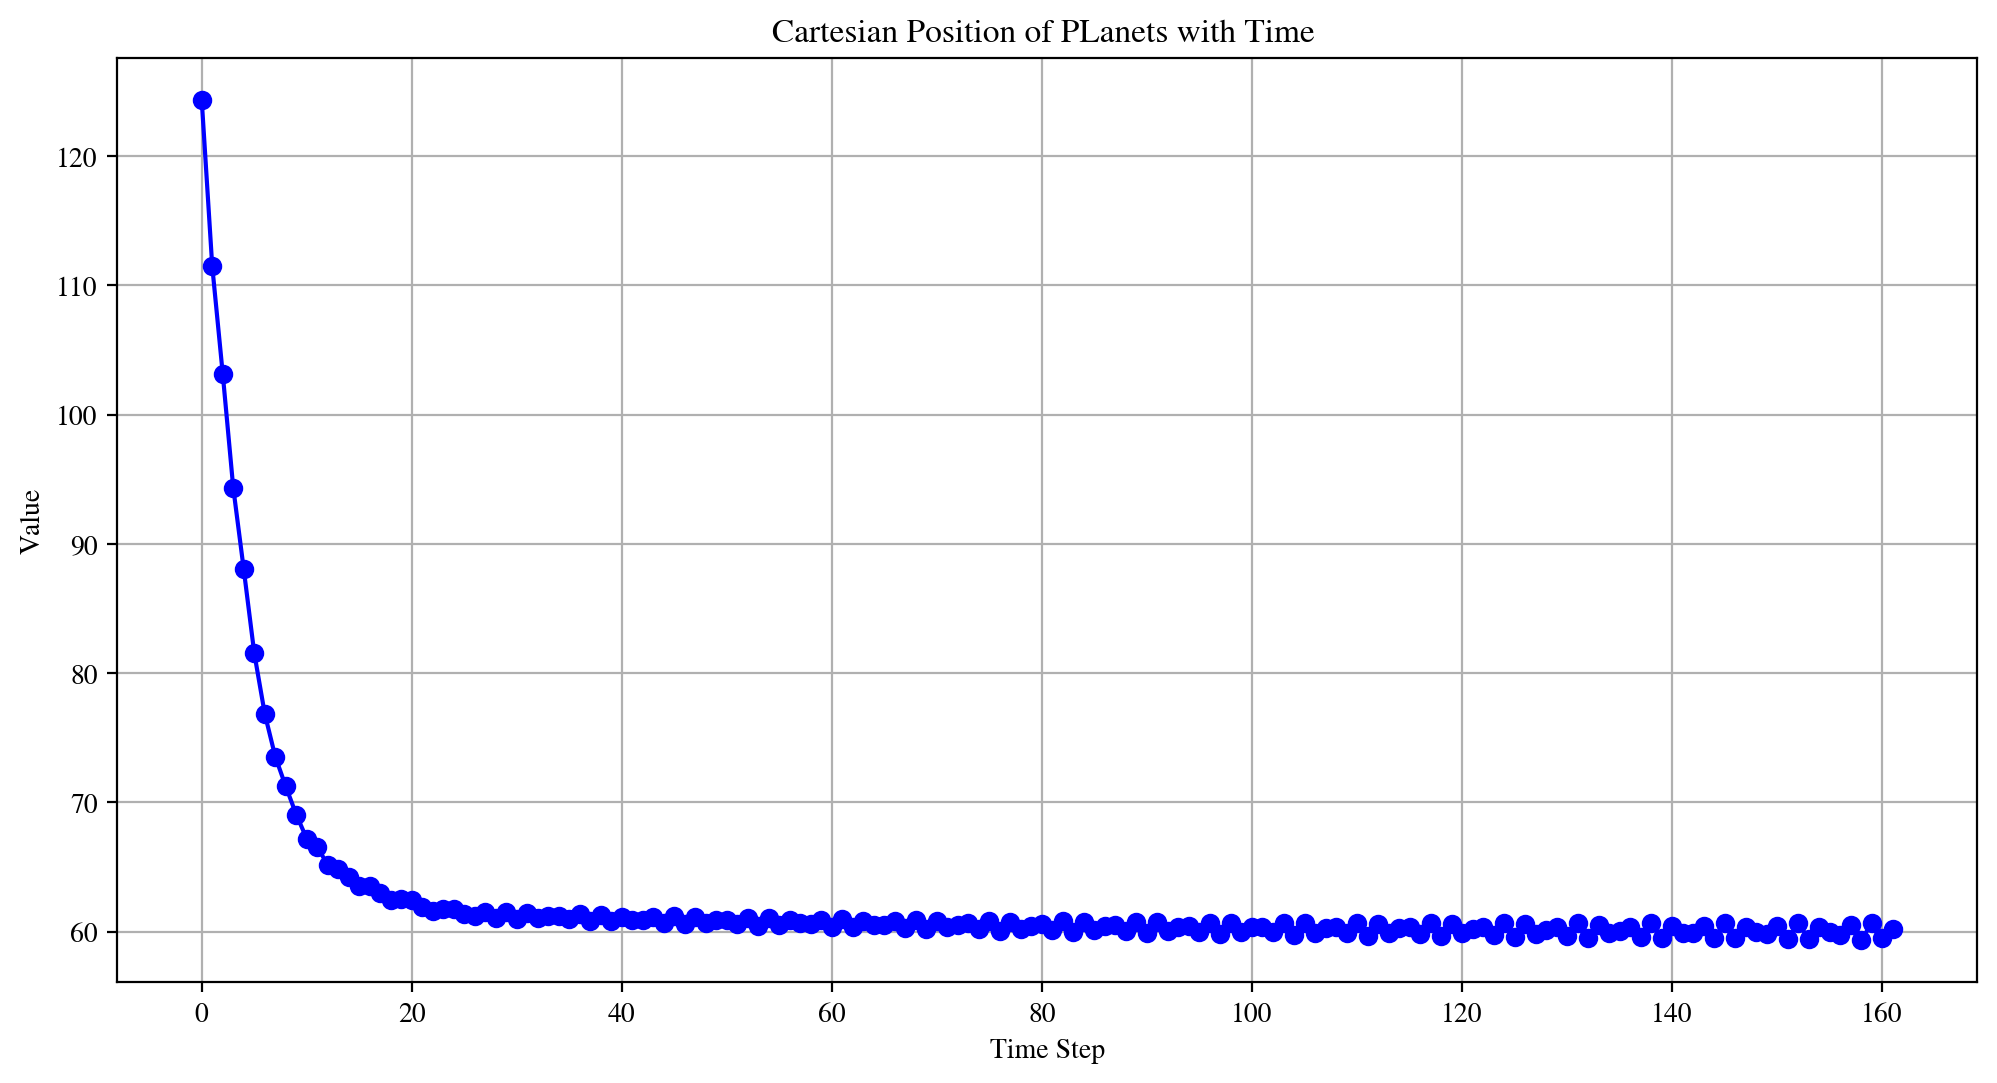

In [41]:
import pandas as pd

df = pd.read_csv('planet_positions.csv')

positions = df.iloc[0]


time_steps = range(len(positions))
plt.figure(figsize=(12, 6))
plt.plot(time_steps, positions, marker='o', linestyle='-', color='b')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title(f'Cartesian Position of PLanets with Time ')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

df = pd.read_csv('planet_positionsRun0.csv')

positions1 = df.iloc[0]
positions2 = df.iloc[0]
positions3 = df.iloc[0]


time_steps = range(len(positions))
plt.figure(figsize=(12, 6))
plt.plot(time_steps, positions, marker='o', linestyle='-', color='b')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title(f'Cartesian Position of PLanets with Time ')
plt.grid(True)
plt.show()